# Exploring Visualizations

In [43]:
import pandas as pd
pumpkins = pd.read_csv('data/US-pumpkins.csv')
pumpkins.head()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [44]:
pumpkins.isnull().sum()


City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [45]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [17]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month


In [42]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


In [20]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
print(pumpkins)

                   Package     Date  Low Price  High Price
70    1 1/9 bushel cartons  9/24/16      15.00        15.0
71    1 1/9 bushel cartons  9/24/16      18.00        18.0
72    1 1/9 bushel cartons  10/1/16      18.00        18.0
73    1 1/9 bushel cartons  10/1/16      17.00        17.0
74    1 1/9 bushel cartons  10/8/16      15.00        15.0
...                    ...      ...        ...         ...
1738    1/2 bushel cartons  9/30/16      15.00        15.0
1739    1/2 bushel cartons  9/30/16      13.75        15.0
1740    1/2 bushel cartons  9/30/16      10.75        15.0
1741    1/2 bushel cartons  9/30/16      12.00        12.0
1742    1/2 bushel cartons  9/30/16      12.00        12.0

[415 rows x 4 columns]


In [22]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [23]:
print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


# Data Visualization using matplotlib

In [24]:
import matplotlib.pyplot as plt

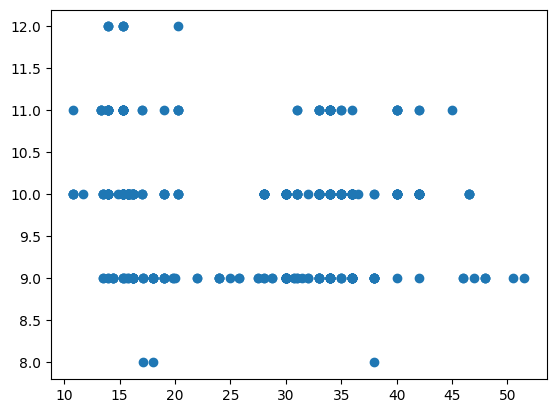

In [47]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

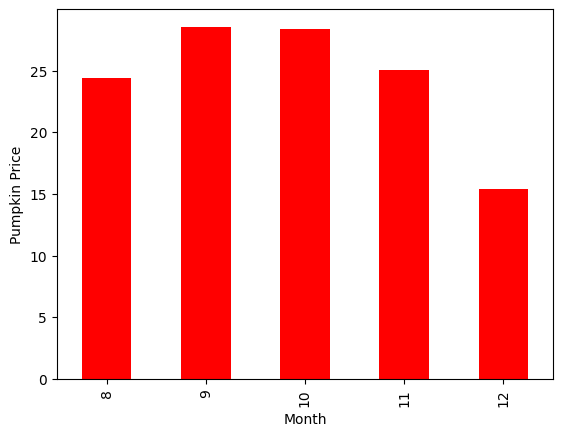

In [36]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar', color='r')
plt.ylabel("Pumpkin Price")

Text(0, 0.5, 'Pumpkin Price')

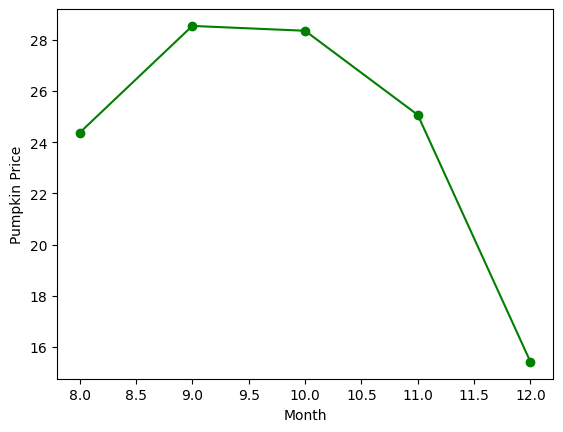

In [38]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='line', marker='o', color='g')
plt.ylabel("Pumpkin Price")

# Data Visualization using seaborn

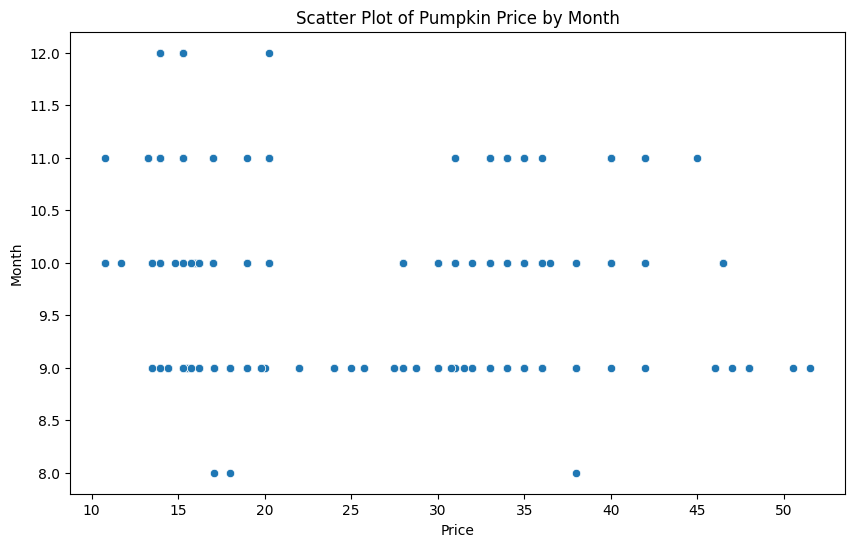

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=price, y=month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.title('Scatter Plot of Pumpkin Price by Month')
plt.show()



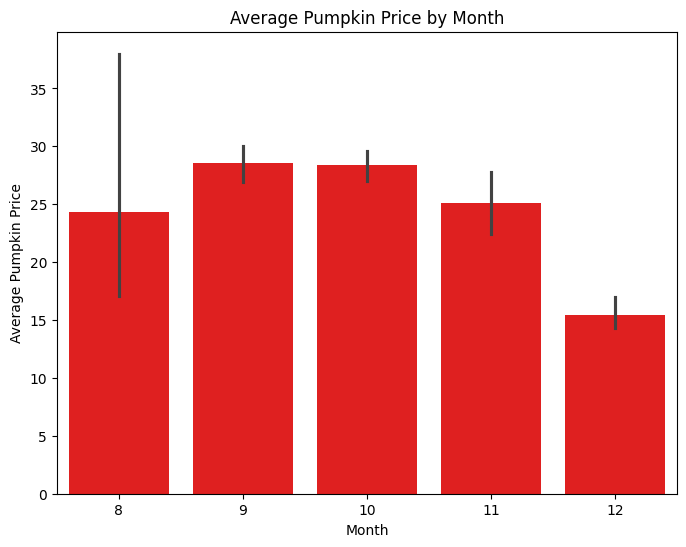

In [51]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Price', data=new_pumpkins, color='r')
plt.xlabel('Month')
plt.ylabel('Average Pumpkin Price')
plt.title('Average Pumpkin Price by Month')
plt.show()

<Figure size 800x600 with 0 Axes>

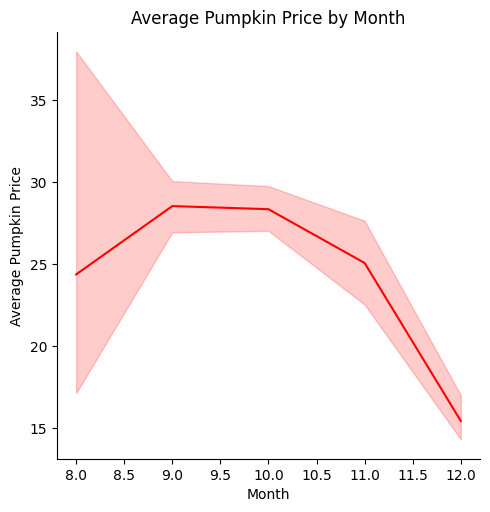

In [53]:
# Line plot
plt.figure(figsize=(8, 6))
sns.relplot(x='Month', y='Price',kind = 'line', data=new_pumpkins, color='r')
plt.xlabel('Month')
plt.ylabel('Average Pumpkin Price')
plt.title('Average Pumpkin Price by Month')
plt.show()

__Seaborn provides higher-level functions that are specifically tailored for statistical visualization tasks,making it often easier and quicker to create complex visualizations with fewer lines of code__
